In [1]:
import Pkg
Pkg.activate("C:/Users/elena_/Documents/GitHub/elementifiniti2425/elementifinitiunipv_pkg")

  Activating project at `C:\Users\elena_\Documents\GitHub\elementifiniti2425\elementifinitiunipv_pkg`


Le variabili in julia vengono passate alle funzioni con il meccanismo "pass by sharing": l'oggetto non viene copiato ma gli argomenti della funzione diventano nuovi bindings e modifico l'argomento originale. 
- Se il valore è immutable (Stringhe, numeri...) creo un nuovo oggetto senza modificare l'originale
- Se il valore è mutable (per esempio array o dizionari) le modifiche fatte ad elementi degli array dentro la funzione le vediamo anche fuori dalla funzione. 

In matlab quando entravo nella funzione veniva fatta una copia dei parametri e poi ci si lavorava. Qui il contrario: quello che succede nella funzione succede anche fuori.





In [2]:
function f(x,y)
    x[1] = 42
    y = y+7
    return y
end

a = [4,5,6]
b = 3
z = f(a,b)
println(a,"\t a è cambiato")
println(b, "\t b non è cambiato")
println(z, "\t questo è l'output")

[42, 5, 6]	 a è cambiato
3	 b non è cambiato
10	 questo è l'output


vantaggio rispetto a matlab che copiava tutto: risparmio tempo e memoria, magari devo fare delle piccole modifiche. spesso, per ricordarci che la funzione modifica gli argomenti, è utile scrivere function f!(x,y) ... invece che function f(x,y)....



esempio: in matlab per plottare una cosa la sintassi base è: plot(x,y).
Se voglio aggiungere qualcosa allora metto plot(x,y, "Linestyle"=.... , ....)
In julia ci sono gli argomenti optionali e keyword. 


In [3]:
function hello(name = "gioia")  #qui name è argomento opzionale
    println("ciao, ", name, "!")
end

hello()
hello("Carlo")

ciao, gioia!
ciao, Carlo!


Quando ho tanti tanti argomenti le cose in matlab diventano un po' più complicate ma in julia è tutto più carino: prima si mettono le variabili obbligatorie senza nulla, e quelle opzionali con la keyword associata. 
attenzione: scrivendo la funzione separo le var obbl e quelle opzionali con un ; .

In [4]:
function describe_person(name; age = 20, city="Roma")
    println("$name ha $age anni ed è di $city")
end

describe_person("Elena", age = 23, city = "Ozzano")

Elena ha 23 anni ed è di Ozzano


Esercizio 1: funzione example che:
- accetta x obbligatorio
- parametro opzionale con valore 10
- parametro con keyword con valore predef 20

restituisce somma x+y+z


In [5]:
function example(x, y=10; z=20)
    return x+y+z
end
x = 5
example(4, 100, z=6)

110

nota: "return" non è obbligatorio (ma è molto consigliato), se non lo metto la funzione restituisce la cosa che c'è alla fine. 
se non voglio un output (tipo none di python) scrivo return nothing


# Differenze finite:

**Esercizio 5** 

Implementare in Julia il metodo delle differenze finite descritto sopra. In particolare:
1. Attivare l’environment creato nella lezione precedente. A questo fine, inserire come prime
due righe del proprio codice:
1 import Pkg
2 Pkg.activate("elementifinitiunipv_pkg") ☑️
2. Caricare i pacchetti necessari: LinearAlgebra (per operazioni con vettori e matrici), SparseArrays
(per gestire matrici tridiagonali in modo efficiente), Plots (per la rappresentazione grafica
degli errori), LaTeXStrings (per scrivere formule in LATEXnei grafici).☑️
3. Definire due funzioni in Julia: f e u che calcolino rispettivamente il termine noto f(x) e la
soluzione esatta u(x) del problema di Poisson monodimensionale. Si prenda come soluzione
esatta u(x) = cos(πx), con corrispondente termine noto f(x) = π2 cos(πx).☑️
4. Implementare una funzione poisson1d che prenda in input il numero di intervalli N, il
termine noto f, i dati di Dirichlet ga e gb e restituisca la soluzione approssimata uh del
problema di Poisson monodimensionale. Si presti particolare attenzione a utilizzare una
rappresentazione sparsa per la matrice A per garantire efficienza computazionale. A tale
fine, si può utilizzare la funzione spdiagm del pacchetto SparseArrays. ☑️

In [6]:
using LinearAlgebra
using SparseArrays
using LaTeXStrings
using Plots
using Printf

In [7]:
 function f(x)
    return (pi^2)*cos.(pi*x)
 end
println(f(pi))

-8.90914742093358


In [8]:
function u(x)
    return cos.(pi*x)
end
println(u(2))

1.0


In [9]:
function poisson1d(N, f, ga, gb)
# build A
    h = 1/N
    # D = [0 => 1/(h^2)*2*ones(N-1), 1 => -1/(h^2)*ones(N-2), -1 => -1/(h^2)*ones(N-2) ]
    A = spdiagm(0 => 1/(h^2)*2*ones(N-1), 1 => -1/(h^2)*ones(N-2), -1 => -1/(h^2)*ones(N-2)
    )
    x = collect(range(0+h,1-h, step = h))
    b = f(x) + vcat([ga/h^2], vcat(zeros(N-3), [gb/h^2]))
    # println(b)
    # println(vcat(zeros(N-3), [4]))
    #return A, b
    uh = A\b
    return uh, x
end

poisson1d (generic function with 1 method)

In [10]:
uh, x= poisson1d(100, f, 1,- 1)

([0.9995081647951896, 0.9980298561556686, 0.9955665346170178, 0.9921206328036264, 0.9876955530279867, 0.982295663933023, 0.9759262961807668, 0.9685937371916378, 0.9603052249395194, 0.9510689408087516  …  -0.9510689408087577, -0.960305224939525, -0.9685937371916429, -0.9759262961807711, -0.9822956639330267, -0.9876955530279895, -0.9921206328036283, -0.995566534617019, -0.9980298561556694, -0.9995081647951898], [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1  …  0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [11]:
uh = poisson1d(100, f, 1, -1)[1]

99-element Vector{Float64}:
  0.9995081647951896
  0.9980298561556686
  0.9955665346170178
  0.9921206328036264
  0.9876955530279867
  0.982295663933023
  0.9759262961807668
  0.9685937371916378
  0.9603052249395194
  0.9510689408087516
  ⋮
 -0.960305224939525
 -0.9685937371916429
 -0.9759262961807711
 -0.9822956639330267
 -0.9876955530279895
 -0.9921206328036283
 -0.995566534617019
 -0.9980298561556694
 -0.9995081647951898

**Esercizio 6**
È noto che, per il problema in questione, con una discretizzazione a differenze finite l’errore
diminuisce quadraticamente rispetto a h, ovvero:
∥uh −u∥∞ ≤C ·h2.
1. Implementare una funzione compute_error che prenda in input la soluzione esatta u, la
soluzione approssimata uh e restituisca l’errore maxi|ui −u(xi)|.
2. Risolvere il problema di Poisson monodimensionale per N = 10,20,40,80,160,320 e calco-
lare l’errore maxi|ui −u(xi)| per ciascuna soluzione approssimata.
3. Realizzare un grafico dell’errore in funzione di h su scala log-log, confrontandolo con una
curva di riferimento O(h2).
4. Divertirsi a personalizzare il grafico, aggiungendo titoli, legende, griglie, ecc.
5. Salvare il grafico prodotto in formato PDF o PNG.


In [12]:
function compute_error(u, uh; N = 100)
    h = 1/N
    x = collect(range(0+h,1-h, step = h))
    u_esatta = u(x)

    error = maximum(abs.(u_esatta-uh))
    return error
end

compute_error (generic function with 1 method)

In [13]:
compute_error(u, uh; N=100)

1.7314874679041914e-5

In [14]:
N = [10,20,40,80,160,320]
err = []
for n in N
push!(err, compute_error(u,poisson1d(n, f, 1, -1)[1];N=n))

end

In [15]:
err

6-element Vector{Any}:
 0.0017276126115373103
 0.00043030470022276113
 0.00010819084812063728
 2.704145540277647e-5
 6.76332992199935e-6
 1.6908080777700008e-6

In [16]:
# plots
uh, x = poisson1d(4, f, 1, -1)
scatter(x, uh, mc =:red, ms = 4, ma = 0.5, label = L"$u_h$")
h = 1/100
l = collect(range(0+h,1-h, step = h))
plot!(x, u(l), lw =2 , label = L"$u$")
xlims!(0, 1)
title!(L"Soluzione esatta $u(x) = cos(\pi x)$ vs soluzione approssimata $u(x)$, $N = %$(N)$", titlefontsize = 10)

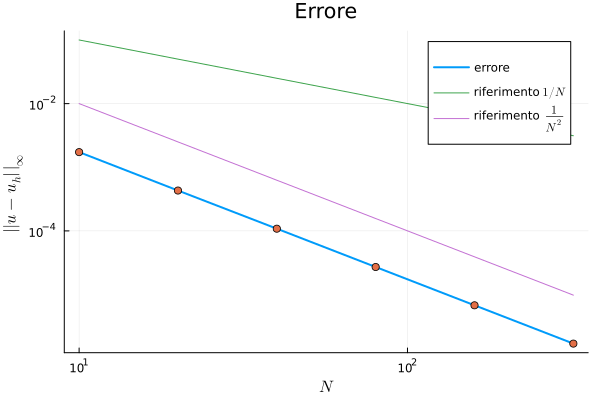

In [ ]:
# plots
plot()
for n in N
uh, x = poisson1d(n, f, 1, -1)
scatter!(x, uh, ms = 4, ma = 0.5, label = L"$u_h$, N = %$(n)$")
end
h = 1/100
l = collect(range(0+h,1-h, step = h))
plot!(l, u(l), lw =2 , label = L"$u$")
xlims!(0, 1)
title!(L"Soluzione esatta $u(x) = cos(\pi x)$ vs soluzione approssimata $u(x)$", titlefontsize = 10)

end


plot(N, err, xscale=:log10, yscale=:log10, label = "errore", lw = 2, ms = 2)
scatter!(N, err,xscale=:log10, yscale=:log10, label = "", ms = 4)
plot!(N, 1 ./N, xscale=:log10, yscale=:log10, label =L"riferimento $1/N$")
plot!(N, 1 ./N.^2, xscale=:log10, yscale=:log10, label =L"riferimento $\frac{1}{N^2}$")

title!("Errore")
xlabel!(L"$N$")
ylabel!(L"$||u - u_h||_{\infty}$")

# Meshing per Elementi Finiti
Come avrete intuito dall’esercizio precedente, le differenze finite si basano su griglie. Gli elementi
finiti, invece, si basano su mesh; in questo corso, nello specifico, su triangolazioni, cioè mesh
costituite da elementi triangolari. Ma come si descrive una triangolazione? La struttura dati
essenziale per rappresentarla è formata dalle coordinate dei vertici e dalla matrice di incidenza.
Per la descrizione di una triangolazione, utilizziamo due matrici:

•T_points: Una matrice di dimensioni 2 × N_points, dove ogni colonna rappresenta le coordinate di un
vertice. In particolare, la prima riga contiene la coordinata x di ciascun punto, mentre la
riga colonna contiene la coordinata y. Qui, Npoints è il numero di nodi della mesh.

•T_ind: Una matrice di dimensioni 3 ×Ntri, dove ogni colonna rappresenta un triangolo e ogni
riga indica l’indice di uno dei tre vertici che compongono il triangolo. Qui, N_tri è il numero totale di triangoli nella mesh.

 Gli elementi della matrice sono interi che indicano gli indici dei vertici corrispondenti nella matrice delle coordinate.
La matrice T descrive la connettività della mesh, ossia come i punti sono connessi per formare i triangoli, mentre la matrice p memorizza le coordinate spaziali di ciascun vertice.
Vi forniremo gran parte delle routines necessarie per il meshing durante il corso, utilizzando il generatore di mesh Gmsh e il pacchetto Julia Gmsh.jl. Le routines si trovano nel file modules/Meshing.jl e verranno aggiornate man mano che il corso progredisce.

**Esercizio 7**
L’obiettivo di questo esercizio è familiarizzare con la struttura dati di una triangolazione.

Ecco le prime linee di codice che dovreste aggiungere al vostro script Julia:
1 using Revise
2 includet("<PATH-TO-FOLDER>/Meshing.jl")


•using Revise:  Questo comando carica il pacchetto Revise.jl, che consente di ricaricare
automaticamente i file modificati durante la sessione, senza bisogno di riavviare Julia.

•includet("<PATH-TO-FOLDER>/Meshing.jl"): Questa riga include il modulo Meshing.jl,
che contiene tutte le funzioni necessarie per lavorare con le mesh. Sostituite <PATH-TO-FOLDER>
con il percorso corretto del file Meshing.jl.

Una volta che queste righe sono state aggiunte, potrete iniziare a sperimentare con le mesh,
utilizzando anche la documentazione delle funzioni nel file Meshing.jl.

1. Usando le funzioni mesh_square, mesh_circle e get_nodes_connectivity, eseguire alcune
mesh per il quadrato e il cerchio unitario con diverse dimensioni della mesh h.

2. Definire una funzione plot_mesh che prende in input la matrice di incidenza T, le coordinate dei vertici p e disegna la triangolazione. La funzione deve iterare su ciascun triangolo e disegnare i bordi uno per uno. Non è necessario concentrarsi sull’efficienza in questa fase, l’obiettivo è essere sicuri di aver compreso correttamente la struttura dei dati.

3. Confrontare il risultato ottenuto con la vostra funzione di visualizzazione con quello ottenuto tramite il pacchetto Meshes.jl utilizzando il seguente codice:

1 import Meshes

2 mesh = to_Meshes(T, p)

3 Meshes.viz(mesh, showsegments = true)



In [18]:
include("C:/Users/elena_/Documents/GitHub/elementifiniti2425/modules/Meshing.jl")

# alcuni test, cambiare qui il numerino e aggiungere display = true per vedere grafichino
mesh_square(0.3)
mesh_circle(0.3)

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.00370622s, CPU 0s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0135982s, CPU 0s)
Info    : 30 nodes 62 elements
Info    : Writing './tmp_square.msh'...
Info    : Done writing './tmp_square.msh'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 30%] Meshing curve 2 (Circle)
Info    : [ 50%] Meshing curve 3 (Circle)
Info    : [ 80%] Meshing curve 4 (Circle)
Info    : Done meshing 1D (Wall 0.000818968s, CPU 0s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00213718s, CPU 0.015625s)
Info    : 75 nodes 151 elements
Info    : Writing './tmp_circle.msh'...
Info    : Done writing './tmp_circle.msh'


"./tmp_circle.msh"

In [19]:
T_circle_ind, T_circle_points= get_nodes_connectivity("tmp_circle.msh")

T_square_ind, T_square_points = get_nodes_connectivity("tmp_square.msh")

# ho pure fatto i bordi blu, per cui serve sto coso
b_circle_ind, b_circle_p = get_boundary_nodes("tmp_circle.msh")
b_square_ind, b_square_p = get_boundary_nodes("tmp_square.msh")

Info    : Reading 'tmp_circle.msh'...
Info    : 10 entities
Info    : 74 nodes
Info    : 150 elements
Info    : Done reading 'tmp_circle.msh'
Info    : Reading 'tmp_square.msh'...
Info    : 9 entities
Info    : 30 nodes
Info    : 62 elements
Info    : Done reading 'tmp_square.msh'
Info    : Reading 'tmp_circle.msh'...
Info    : 10 entities
Info    : 74 nodes
Info    : 150 elements
Info    : Done reading 'tmp_circle.msh'
Info    : Reading 'tmp_square.msh'...
Info    : 9 entities
Info    : 30 nodes
Info    : 62 elements
Info    : Done reading 'tmp_square.msh'


([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [0.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.5000000000020616 0.2500000000010419])

In [21]:
# plot della mesh
function plot_mesh(T_ind, T_points, b_ind, b_p)
    p = plot(axis = false, ratio = 1)
    N_tri = size(T_ind, 2)
    N_points = size(T_points, 2)
    N_bounds = size(b_ind,1)
    # list_points_x = []
    # list_points_y = []
    boundary_nodes = []
    for j in 1:N_bounds
        push!(boundary_nodes, b_p[:, j])
    end
    for i in 1:N_tri
        i1, i2, i3 = T_ind[:, i]
        
        x1, y1 = T_points[:, i1]
        x2, y2 = T_points[:, i2]
        x3, y3 = T_points[:, i3]
        # append!(list_points_x, [x1, x2, x3])
        # append!(list_points_y, [y1,y2,y3])
        plot!([x1,x2], [y1, y2], label="", lw=2, color=:green)
        plot!([x2, x3], [y2,y3], label="", lw=2, color=:green)
        plot!([x3,x1], [y3,y1], label="", lw=2, color=:green)

        if [x1, y1] in boundary_nodes && [x2, y2] in boundary_nodes
            plot!([x1,x2], [y1, y2], label="", lw=2, color=:blue)
        end
        if [x2, y2] in boundary_nodes && [x3, y3] in boundary_nodes
            plot!([x2,x3], [y2, y3], label="", lw=2, color=:blue)
        end

        if [x3, y3] in boundary_nodes && [x1, y1] in boundary_nodes
            plot!([x3,x1], [y3,y1], label="", lw=2, color=:blue)
        end
    end
    # nei for i plot non vengono mostrati ma salvati, così si vedono
    display(p)
    # plot(list_points_x, list_points_y, label = "", color=:green)
    # return Nothing
end


plot_mesh (generic function with 1 method)

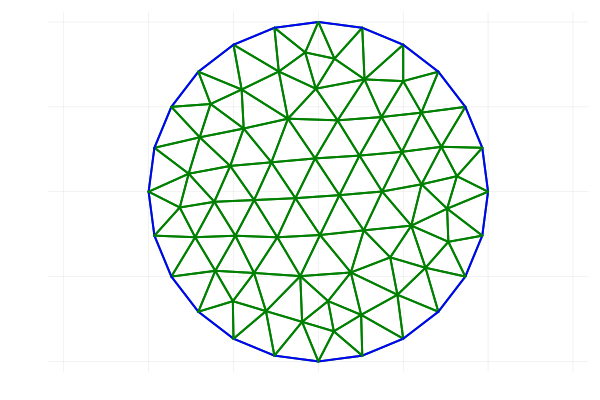

In [22]:
# prova per cerchio e quadrato, prodotti prima
plot_mesh(T_circle_ind, T_circle_points, b_circle_ind, b_circle_p)

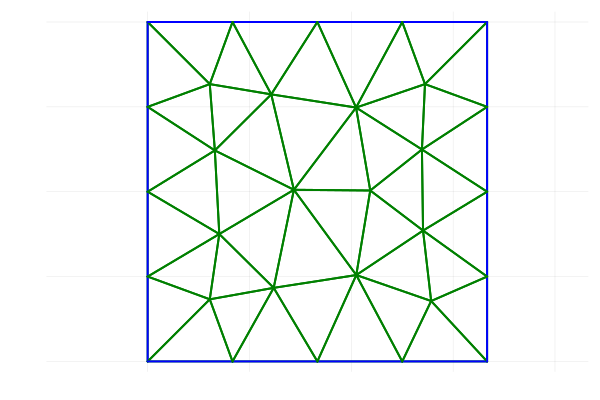

In [23]:
plot_mesh(T_square_ind, T_square_points, b_square_ind, b_square_p)

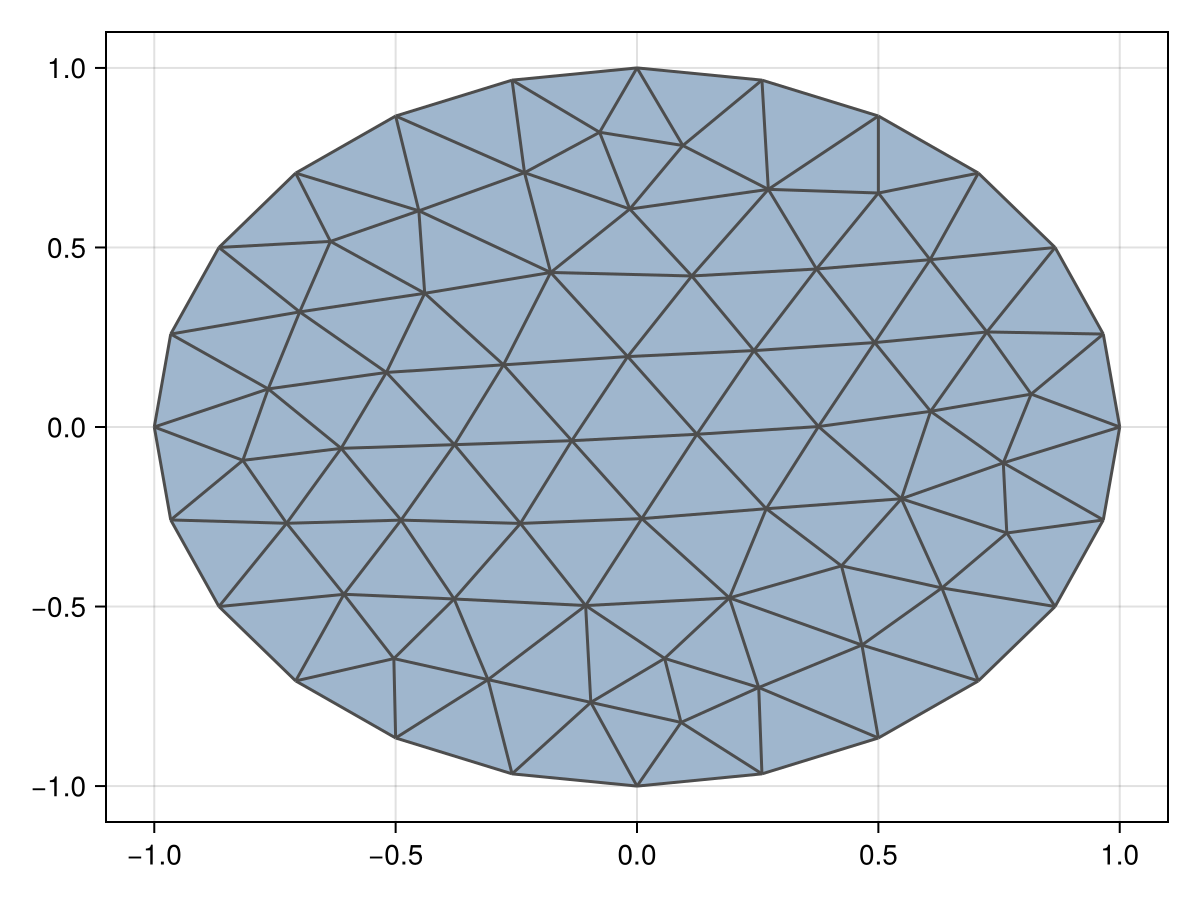

In [26]:
# prova del 9 con comando già pronto (è più bello il mio)
import Meshes
mesh = to_Meshes(T_circle_ind, T_circle_points)
Meshes.viz(mesh, showsegments = true)